<a href="https://colab.research.google.com/github/ElTaqui/prueba-git-hub/blob/main/Laboratorio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de Librerías

In [ ]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd


#Regresión Multivariable

Importación de DataSet de Google Drive, limpieza del dataset y visualización de datos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',')
data = data.dropna()
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64


Cargamos las variables x, y y m demás de tomar datos del mismo data set para predicciones

In [ ]:
X = data.iloc[:15000, [5,9,10,11,12,13,14,15,16,17]]
y = data.iloc[:15000, 4]
m = y.size

X_predic = data.iloc[15000:15100, [5,9,10,11,12,13,14,15,16,17]]
y_predic = data.iloc[15000:15100, 4]
m_predic = y_predic.size

Visualización de datos

In [ ]:
print(X)
print('------------------------------------------------------------------------------')
print(y)
print(m)
print('------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------')
print(X_predic)
print('------------------------------------------------------------------------------')
print(y_predic)
print(m_predic)

       potential  crossing  finishing  heading_accuracy  short_passing  \
0           71.0      49.0       44.0              71.0           61.0   
1           71.0      49.0       44.0              71.0           61.0   
2           66.0      49.0       44.0              71.0           61.0   
3           65.0      48.0       43.0              70.0           60.0   
4           65.0      48.0       43.0              70.0           60.0   
...          ...       ...        ...               ...            ...   
15421       77.0      54.0       37.0              42.0           80.0   
15422       74.0      53.0       36.0              41.0           80.0   
15423       73.0      40.0       32.0              40.0           72.0   
15424       76.0      40.0       32.0              40.0           72.0   
15425       76.0      40.0       32.0              40.0           72.0   

       volleys  dribbling  curve  free_kick_accuracy  long_passing  
0         44.0       51.0   45.0          

Funcion para sacar X nomalizada, mu(Media calculada), sigma(desviación estandar)

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Mostramos media, desviación estandar y X normalizada

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 potential             73.931467
crossing              55.756800
finishing             50.803533
heading_accuracy      57.063733
short_passing         63.068067
volleys               50.283200
dribbling             60.495000
curve                 54.409933
free_kick_accuracy    50.329867
long_passing          57.490400
dtype: float64
Desviación estandar calculada:
 potential              6.673038
crossing              17.190569
finishing             18.895562
heading_accuracy      15.814881
short_passing         14.198464
volleys               17.972789
dribbling             17.611855
curve                 18.122918
free_kick_accuracy    17.632016
long_passing          14.328304
dtype: float64
       potential  crossing  finishing  heading_accuracy  short_passing  \
0      -0.439300 -0.393053  -0.360060          0.881212      -0.145654   
1      -0.439300 -0.393053  -0.360060          0.881212      -0.145654   
2      -1.188584 -0.393053  -0.360060          0.881212   

Agregamos la columna de 1 x^0

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

Funcion que calcula el Costo J

In [ ]:
def computeCostMulti(X, y, theta):
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Funcion que calcula las Theta y el historial de costo

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

Calculo de Theta y el costo menor

8.758587824413693


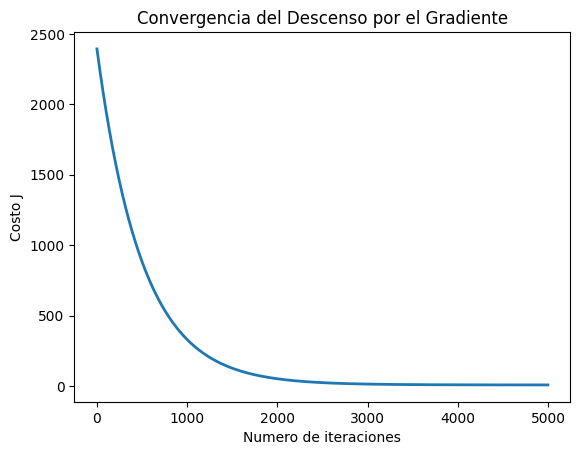

In [ ]:
alpha = 0.001
num_iters = 5000

theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(J_history[-1])

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

Calculo de predicciones

In [ ]:
X_norm, mu, sigma = featureNormalize(X_predic)
X_regresion = np.concatenate([np.ones((m_predic, 1)), X_norm], axis=1)
for i in range(m_predic):
  X_array = np.array(X_regresion[i])
  Prediccion = ´´
  Error = y_predic.iloc[i] - Prediccion
  print('La predicción es: ',Prediccion,'El valor original es de: ', y_predic.iloc[i],' y el error de: ', Error)

La predicción es:  65.30836809566905 El valor original es de:  69.0  y el error de:  3.691631904330947
La predicción es:  65.30836809566905 El valor original es de:  69.0  y el error de:  3.691631904330947
La predicción es:  65.30836809566905 El valor original es de:  69.0  y el error de:  3.691631904330947
La predicción es:  65.98029815599872 El valor original es de:  70.0  y el error de:  4.0197018440012755
La predicción es:  67.36006222195293 El valor original es de:  72.0  y el error de:  4.63993777804707
La predicción es:  68.1024103386791 El valor original es de:  73.0  y el error de:  4.897589661320893
La predicción es:  71.41731689787339 El valor original es de:  73.0  y el error de:  1.5826831021266088
La predicción es:  69.09638286374991 El valor original es de:  71.0  y el error de:  1.9036171362500909
La predicción es:  68.35467283781131 El valor original es de:  67.0  y el error de:  -1.3546728378113073
La predicción es:  68.35467283781131 El valor original es de:  67.0  y

#Regresión Polinomial

Importación de DataSet de Google Drive, limpieza del dataset y visualización de datos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',')
data = data.dropna()
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64


Cargamos las variables x, y y m demás de tomar datos del mismo data set para predicciones

In [ ]:
X = data.iloc[:15000, [5,9,10,11,12,13,14,15,16,17]]
y = data.iloc[:15000, 4]
m = y.size

X_predic = data.iloc[15000:15100, [5,9,10,11,12,13,14,15,16,17]]
y_predic = data.iloc[15000:15100, 4]
m_predic = y_predic.size

Visualización de datos

In [ ]:
print(X)
print('------------------------------------------------------------------------------')
print(y)
print(m)
print('------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------')
print(X_predic)
print('------------------------------------------------------------------------------')
print(y_predic)
print(m_predic)

       potential  crossing  finishing  heading_accuracy  short_passing  \
0           71.0      49.0       44.0              71.0           61.0   
1           71.0      49.0       44.0              71.0           61.0   
2           66.0      49.0       44.0              71.0           61.0   
3           65.0      48.0       43.0              70.0           60.0   
4           65.0      48.0       43.0              70.0           60.0   
...          ...       ...        ...               ...            ...   
15421       77.0      54.0       37.0              42.0           80.0   
15422       74.0      53.0       36.0              41.0           80.0   
15423       73.0      40.0       32.0              40.0           72.0   
15424       76.0      40.0       32.0              40.0           72.0   
15425       76.0      40.0       32.0              40.0           72.0   

       volleys  dribbling  curve  free_kick_accuracy  long_passing  
0         44.0       51.0   45.0          

Concatenamos X con X al cuadrado

In [ ]:
X = np.concatenate([X, X * X], axis=1)

Normalizacion de datos por funcion

In [ ]:
def  featureNormalizeFuncion(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalización y visualización de resultados

In [ ]:
X_norm, mu, sigma = featureNormalizeFuncion(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[  71.   49.   44. ... 2025. 1521. 4096.]
 [  71.   49.   44. ... 2025. 1521. 4096.]
 [  66.   49.   44. ... 2025. 1521. 4096.]
 ...
 [  73.   40.   32. ... 3844. 1600. 4225.]
 [  76.   40.   32. ... 3844. 1600. 4225.]
 [  76.   40.   32. ... 3844. 1600. 4225.]]
Media calculada: [  73.93146667   55.7568       50.80353333   57.06373333   63.06806667
   50.2832       60.495        54.40993333   50.32986667   57.4904
 5510.3912     3404.3364     2938.04126667 3506.38013333 4179.1774
 2851.42133333 3969.82246667 3288.881      2843.98346667 3510.4464    ]
Desviación estandar calculada: [   6.67303803   17.19056874   18.89556211   15.81488133   14.19846354
   17.97278863   17.61185515   18.12291794   17.63201599   14.32830443
  982.99385825 1758.04866691 1836.78819526 1632.48252496 1575.13467485
 1713.89772914 1851.47896904 1839.50144747 1742.82059754 1542.41770034]
[[-0.43930016 -0.39305273 -0.36005985 ... -0.68707801 -0.75910479
   0.37963361]
 [-0.43930016 -0.39305273 -0.36005985 ... -0.

Agregamos la columna de 1 a x

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

Funcion que calcula el Costo J

In [ ]:
def computeCostMulti(X, y, theta):
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Funcion que calcula las Theta y el historial de costo

In [ ]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Calculo de Theta y el costo menor

7.336309818965626


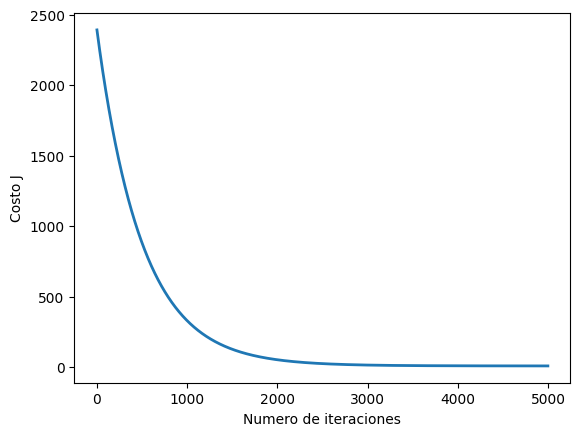

In [ ]:
alpha = 0.001
num_iters = 5000

theta = np.zeros(21)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print(J_history[-1])

Calculo de predicciones

In [ ]:
X_predic = np.concatenate([X_predic, X_predic * X_predic], axis=1)
X_norm, mu, sigma = featureNormalize(X_predic)
X_regresion = np.concatenate([np.ones((m_predic, 1)), X_norm], axis=1)
for i in range(m_predic):
  X_array = np.array(X_regresion[i])
  Prediccion = np.dot(X_array, theta)
  Error = y_predic.iloc[i] - Prediccion
  print('La predicción es: ',Prediccion,'El valor original es de: ', y_predic.iloc[i],' y el error de: ', Error)

La predicción es:  65.01813013678775 El valor original es de:  69.0  y el error de:  3.9818698632122533
La predicción es:  65.01813013678775 El valor original es de:  69.0  y el error de:  3.9818698632122533
La predicción es:  65.01813013678775 El valor original es de:  69.0  y el error de:  3.9818698632122533
La predicción es:  65.76213401026118 El valor original es de:  70.0  y el error de:  4.237865989738822
La predicción es:  67.20315407488157 El valor original es de:  72.0  y el error de:  4.796845925118433
La predicción es:  67.94019410462278 El valor original es de:  73.0  y el error de:  5.059805895377224
La predicción es:  71.09611713813293 El valor original es de:  73.0  y el error de:  1.903882861867075
La predicción es:  68.35013031974013 El valor original es de:  71.0  y el error de:  2.6498696802598687
La predicción es:  67.5386798546418 El valor original es de:  67.0  y el error de:  -0.5386798546417992
La predicción es:  67.5386798546418 El valor original es de:  67.0  

#Ecuacion de la normal

Importación de DataSet de Google Drive, limpieza del dataset y visualización de datos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',')
data = data.dropna()
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64


Cargamos las variables x, y y m demás de tomar datos del mismo data set para predicciones

In [ ]:
X = data.iloc[:15000, [5,9,10,11,12,13,14,15,16,17]]
y = data.iloc[:15000, 4]
m = y.size

X_predic = data.iloc[15000:15100, [5,9,10,11,12,13,14,15,16,17]]
y_predic = data.iloc[15000:15100, 4]
m_predic = y_predic.size

Visualización de datos

In [ ]:
print(X)
print('------------------------------------------------------------------------------')
print(y)
print(m)
print('------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------')
print(X_predic)
print('------------------------------------------------------------------------------')
print(y_predic)
print(m_predic)

       potential  crossing  finishing  heading_accuracy  short_passing  \
0           71.0      49.0       44.0              71.0           61.0   
1           71.0      49.0       44.0              71.0           61.0   
2           66.0      49.0       44.0              71.0           61.0   
3           65.0      48.0       43.0              70.0           60.0   
4           65.0      48.0       43.0              70.0           60.0   
...          ...       ...        ...               ...            ...   
15421       77.0      54.0       37.0              42.0           80.0   
15422       74.0      53.0       36.0              41.0           80.0   
15423       73.0      40.0       32.0              40.0           72.0   
15424       76.0      40.0       32.0              40.0           72.0   
15425       76.0      40.0       32.0              40.0           72.0   

       volleys  dribbling  curve  free_kick_accuracy  long_passing  
0         44.0       51.0   45.0          

Agregamos la columna de 1 x^0

In [ ]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Funcion para conseguir Theta mediante la ecuación de la Normal

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

Calculo de Theta y el costo

In [ ]:
theta = normalEqn(X, y)
print('theta: ',theta)
print('------------------------------------------------------------------------')
j=computeCostMulti(X, y, theta)
print('Costo: ',j)

theta:  [ 7.12422004e+00  7.26636211e-01  4.18071447e-02  2.93402113e-03
  5.51860516e-02  1.21179346e-02  2.73861292e-02 -8.75466715e-02
  7.34716737e-03  3.13937786e-02  6.23878280e-02]
------------------------------------------------------------------------
Costo:  8.56974815446318


Calculo de predicciones

In [ ]:
X_regresion = np.concatenate([np.ones((m_predic, 1)), X_predic], axis=1)
for i in range(m_predic):
  X_array = np.array(X_regresion[i])
  Prediccion = np.dot(X_array, theta)
  Error = y_predic.iloc[i] - Prediccion
  print('La predicción es: ',Prediccion,'El valor original es de: ', y_predic.iloc[i],' y el error de: ', Error)

La predicción es:  67.2985655110232 El valor original es de:  69.0  y el error de:  1.7014344889768012
La predicción es:  67.2985655110232 El valor original es de:  69.0  y el error de:  1.7014344889768012
La predicción es:  67.2985655110232 El valor original es de:  69.0  y el error de:  1.7014344889768012
La predicción es:  68.14684445391907 El valor original es de:  70.0  y el error de:  1.8531555460809273
La predicción es:  69.65430030366473 El valor original es de:  72.0  y el error de:  2.3456996963352736
La predicción es:  70.51783010492275 El valor original es de:  73.0  y el error de:  2.4821698950772486
La predicción es:  74.46610055817594 El valor original es de:  73.0  y el error de:  -1.4661005581759383
La predicción es:  71.77134562050777 El valor original es de:  71.0  y el error de:  -0.7713456205077733
La predicción es:  71.14346431818824 El valor original es de:  67.0  y el error de:  -4.1434643181882365
La predicción es:  71.14346431818824 El valor original es de:  6